## Latar Belakang
Perusahaan telekomunikasi yang berbasis langganan sangat bergantung pada keberhasilan dalam mempertahankan pelanggan untuk menjaga pendapatan berkelanjutan. Dalam industri ini, kehilangan pelanggan atau churn merupakan tantangan serius karena akuisisi pelanggan baru memerlukan biaya yang lebih tinggi dibandingkan mempertahankan pelanggan lama.

Seiring bertambahnya data pelanggan dari berbagai aspek seperti lama berlangganan, jenis kontrak, dan layanan yang digunakan, perusahaan memiliki peluang untuk **memanfaatkan data pelanggan untuk mendukung pengambilan keputusan yang lebih tepat** dalam memahami pola perilaku pelanggan. Pendekatan ini diharapkan dapat membantu perusahaan, khususnya **manajemen dan tim pemasaran**, dalam menyusun strategi yang lebih efektif untuk mengurangi tingkat churn dan meningkatkan kepuasan pelanggan secara keseluruhan.

## Pernyataan Masalah
Saat ini, **perusahaan belum memiliki model prediktif** yang mampu mengidentifikasi pelanggan yang berisiko churn. Akibatnya, perusahaan tidak dapat mengambil tindakan pencegahan sebelum pelanggan memutuskan untuk berhenti, yang menyebabkan hilangnya peluang mempertahankan pelanggan dan berdampak langsung pada penurunan pendapatan serta meningkatnya biaya operasional.

## Tujuan
- **Membangun model machine learning klasifikasi** yang mampu memprediksi kemungkinan pelanggan melakukan churn berdasarkan atribut historis seperti tenure, jenis kontrak, layanan internet, dan biaya bulanan.

- **Memungkinkan perusahaan untuk mengambil tindakan lebih awal** terhadap pelanggan yang berisiko churn.

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [87]:
df=pd.read_csv('data_telco_customer_churn.csv')
df.head(5)

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


Dataset Telco Customer Churn berisi data pelanggan dari sebuah perusahaan telekomunikasi dengan tujuan untuk memprediksi apakah seorang pelanggan **akan berhenti berlangganan (churn) atau tidak**.

Kolom-kolom yang tersedua dakan dataset ini mencakup
- Dependents = Apakah pelanggan punya tanggungan keluarga atau tidak
- Tenure = Berapa lama (dalam bulan) pelanggan sudah pakai layanan
- OnlineSecurity = Pelanggan pakai layanan keamanan online atau tidak
- OnlineBackup = Pelanggan pakai layanan backup online atau tidak
- InternetService = Jenis layanan internet yang dipakai (DSL, Fiber optic, atau tidak ada)
- DeviceProtection = Apakah pelanggan langganan perlindungan perangkat
- TechSupport = Apakah pelanggan pakai layanan dukungan teknis
- Contract = Jenis kontrak yang dipilih pelanggan, misalnya bulanan, satu tahun, atau dua tahun
- PaperlessBilling = Apakah tagihan dikirim secara digital
- MonthlyCharges = Jumlah tagihan bulanan yang harus dibayar pelanggan
- Churn = kolom target, menunjukkan apakah pelanggan keluar (Yes) atau tetap langganan (No)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


Hasil `df.info()`, dataset ini terdiri dari **4.930 baris dan 11 kolom**. Sebagian besar kolom bertipe **object** (termasuk kolom kategori seperti Contract, TechSupport, dll), sementara kolom **tenure bertipe integer** dan **MonthlyCharges bertipe float**.

In [89]:
df.describe(include='all')

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
count,4930,4930.000000,4930,4930,4930,4930,4930,4930,4930,4930.000000,4930
unique,2,NaN,3,3,3,3,3,3,2,NaN,2
top,No,NaN,No,No,Fiber optic,No,No,Month-to-month,Yes,NaN,No
freq,3446,NaN,2445,2172,2172,2186,2467,2721,2957,NaN,3614
mean,NaN,32.401217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.883032,NaN
std,NaN,24.501193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.923960,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.800000,NaN
25%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.050000,NaN
50%,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN


Dari hasil `df.describe(include='all')`, berikut beberapa informasi awal yang bisa diambil dari data ini antara lain:

- Kolom tenure (lama berlangganan) memiliki nilai minimum 0 dan maksimum 72 bulan, dengan rata-rata sekitar 32 bulan, artinya sebagian besar pelanggan sudah cukup lama berlangganan.

- Kolom MonthlyCharges menunjukkan rata-rata tagihan bulanan sekitar 64.88, dengan tagihan terendah 18.80 dan tertinggi 118.65.

- Beberapa kolom kategori seperti OnlineSecurity, OnlineBackup, DeviceProtection, dan TechSupport memiliki 3 nilai unik, yaitu “Yes”, “No”, dan “No internet service”.

- Kolom Contract paling sering diisi dengan Month-to-month sebanyak 2.721 pelanggan, menandakan kebanyakan pelanggan memilih kontrak jangka pendek.

In [90]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.733063
Yes    0.266937
Name: proportion, dtype: float64

Hasil pengecekan proporsi pada kolom **Churn** menunjukkan bahwa sekitar **73.3% pelanggan tidak churn**, sementara **26.7% sisanya churn**. Ini berarti mayoritas pelanggan masih bertahan menggunakan layanan, namun tetap ada sekitar seperempat yang berhenti berlangganan. **Distribusi ini tergolong tidak seimbang**, sehingga perlu diperhatikan saat pemodelan.

In [91]:
df.isna().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

Dari hasil pengecekan nilai kosong menggunakan `df.isna().sum()`, bisa dipastikan bahwa **seluruh kolom tidak memiliki missing values**. Artinya, dataset ini sudah bersih dalam hal kelengkapan data dan bisa langsung diproses tanpa perlu melakukan imputasi atau pembersihan data yang hilang.

['No' 'Yes' 'No internet service']


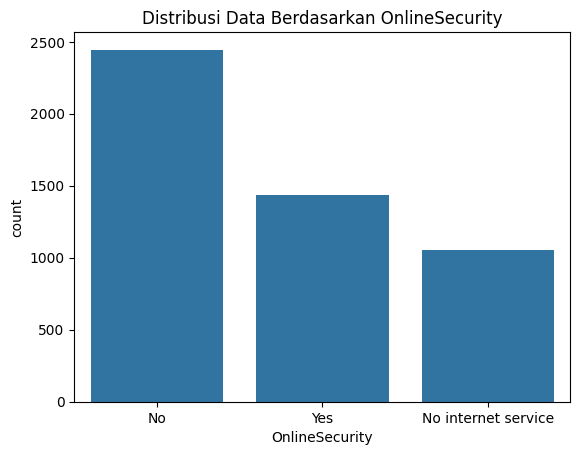

In [92]:
unique_values = df['OnlineSecurity'].unique()
print(unique_values)

sns.countplot(x='OnlineSecurity',data=df)
plt.title('Distribusi Data Berdasarkan OnlineSecurity')
plt.show()

Grafik di atas menunjukkan distribusi data berdasarkan kolom OnlineSecurity. Terdapat tiga kategori: "Yes", "No", dan "No internet service". Mayoritas pelanggan tercatat tidak menggunakan layanan keamanan online ("No"), disusul oleh yang menggunakan layanan ini ("Yes"), dan sisanya adalah pelanggan yang tidak memiliki layanan internet sama sekali.

['No' 'Yes' 'No internet service']


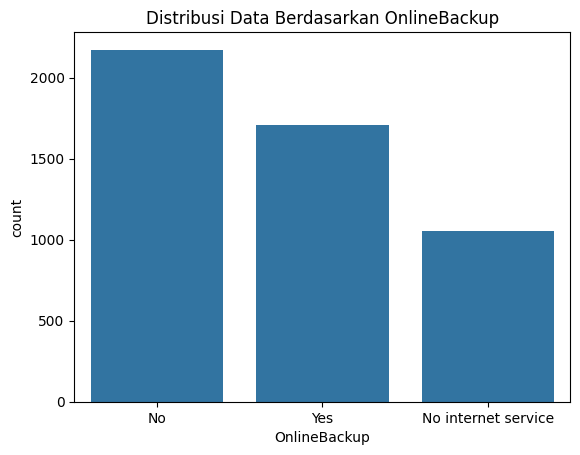

In [93]:
unique_values = df['OnlineBackup'].unique()
print(unique_values)

sns.countplot(x='OnlineBackup',data=df)
plt.title('Distribusi Data Berdasarkan OnlineBackup')
plt.show()

Grafik di atas memperlihatkan distribusi data berdasarkan kolom OnlineBackup. Sama seperti sebelumnya, terdapat tiga kategori: "Yes", "No", dan "No internet service". Mayoritas pelanggan tidak menggunakan layanan backup online, disusul oleh pelanggan yang menggunakannya, dan yang paling sedikit adalah pelanggan tanpa layanan internet.

['DSL' 'Fiber optic' 'No']


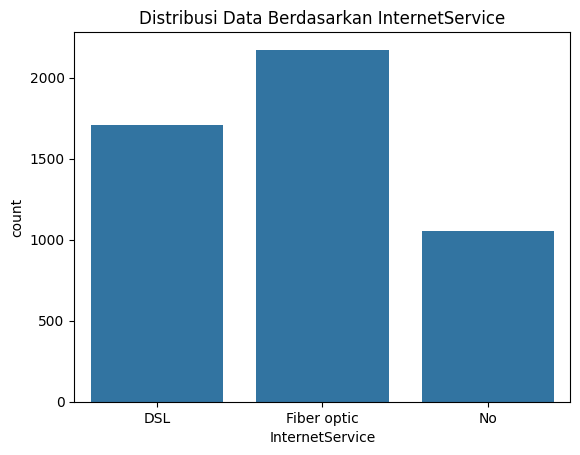

In [94]:
unique_values = df['InternetService'].unique()
print(unique_values)

sns.countplot(x='InternetService',data=df)
plt.title('Distribusi Data Berdasarkan InternetService')
plt.show()

Grafik di atas menunjukkan distribusi jenis layanan internet yang digunakan oleh pelanggan. Sebagian besar pelanggan menggunakan Fiber optic, disusul oleh DSL, dan sisanya tidak memiliki layanan internet sama sekali (kategori "No").

['Yes' 'No internet service' 'No']


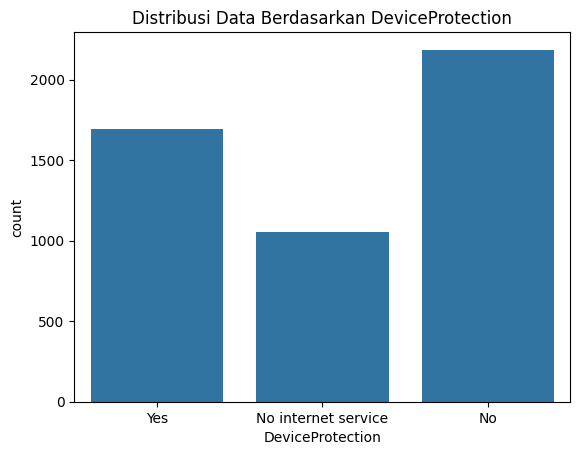

In [95]:
unique_values = df['DeviceProtection'].unique()
print(unique_values)

sns.countplot(x='DeviceProtection',data=df)
plt.title('Distribusi Data Berdasarkan DeviceProtection')
plt.show()

Grafik di atas memperlihatkan distribusi data berdasarkan kolom DeviceProtection. Terdapat tiga kategori: "Yes", "No", dan "No internet service". Sebagian besar pelanggan tercatat tidak menggunakan layanan perlindungan perangkat, disusul oleh yang menggunakan layanan ini, dan sisanya adalah pelanggan yang tidak memiliki layanan internet.

['Yes' 'No' 'No internet service']


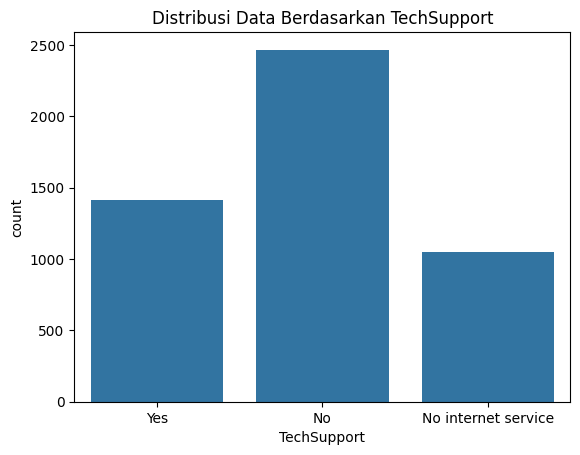

In [96]:
unique_values = df['TechSupport'].unique()
print(unique_values)

sns.countplot(x='TechSupport',data=df)
plt.title('Distribusi Data Berdasarkan TechSupport')
plt.show()

Grafik distribusi pada kolom TechSupport menunjukkan bahwa sebagian besar pelanggan tidak menggunakan layanan dukungan teknis, sementara yang menggunakan layanan ini jumlahnya lebih sedikit. Selain itu, terdapat juga kelompok pelanggan yang tidak memiliki layanan internet, sehingga otomatis tidak bisa mengakses fitur ini.

In [97]:
cols_internet = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                 'TechSupport']
for col in cols_internet:
    df[col] = df[col].replace({'No internet service': 'No'})

Pada tahap preprocessing, dilakukan penggantian nilai **"No internet service"** menjadi **"No"** pada beberapa kolom layanan seperti OnlineSecurity, OnlineBackup, DeviceProtection, dan TechSupport. Hal ini dilakukan karena, pelanggan yang **tidak memiliki layanan internet** otomatis juga **tidak menggunakan layanan tambahan tersebut**. Maka, menyamakan "No internet service" dengan "No" membuat kategorinya menjadi lebih sederhana, mengurangi kompleksitas data, dan memudahkan proses encoding pada tahap modeling.

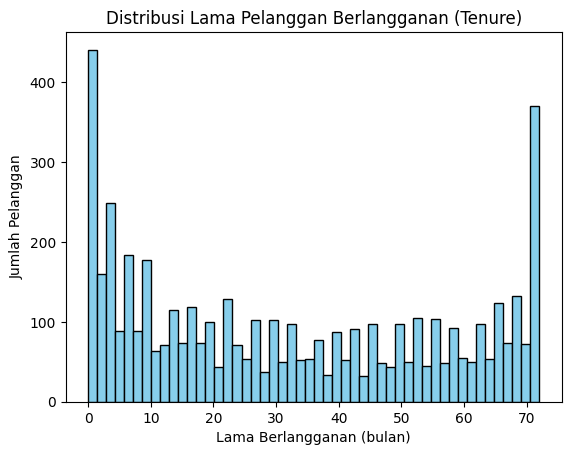

In [98]:
plt.hist(df['tenure'], bins=50, color='skyblue',
edgecolor='black')

plt.xlabel('Lama Berlangganan (bulan)')
plt.ylabel('Jumlah Pelanggan')
plt.title('Distribusi Lama Pelanggan Berlangganan (Tenure)')
plt.show()

Histogram di atas menunjukkan distribusi data berdasarkan kolom tenure, yaitu lama pelanggan menggunakan layanan (dalam bulan). Terlihat bahwa distribusinya tidak merata, dengan dua puncak yang mencolok di awal (bulan ke-0) dan akhir (bulan ke-72). Hal ini mengindikasikan bahwa banyak pelanggan yang **baru saja bergabung** atau **sudah lama berlangganan**, sementara jumlah pelanggan di tengah-tengah (durasi menengah) cenderung lebih sedikit.

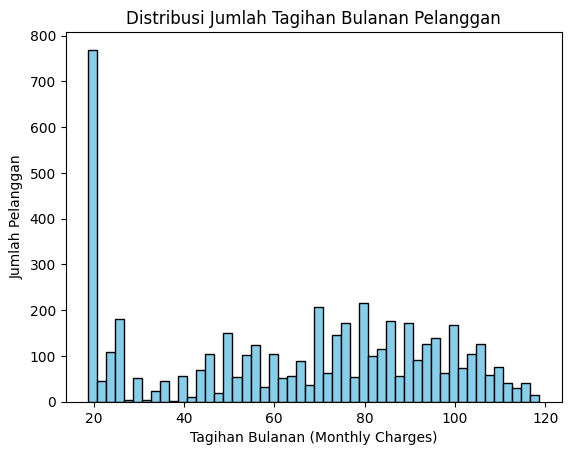

In [99]:
plt.hist(df['MonthlyCharges'], bins=50, color='skyblue',
edgecolor='black')

plt.xlabel('Tagihan Bulanan (Monthly Charges)')
plt.ylabel('Jumlah Pelanggan')
plt.title('Distribusi Jumlah Tagihan Bulanan Pelanggan')
plt.show()

Histogram di atas memperlihatkan distribusi data pada kolom **MonthlyCharges** yang telah melalui proses standardisasi. Nilai tagihan bulanan pelanggan diskalakan sehingga berada pada rentang sekitar -1.5 hingga 1.5, dengan sebagian besar data terkonsentrasi di sekitar nilai tengah (0). Distribusi ini menunjukkan bahwa mayoritas pelanggan memiliki tagihan bulanan yang mendekati rata-rata, sementara hanya sebagian kecil yang memiliki tagihan sangat rendah atau sangat tinggi. 

<Axes: >

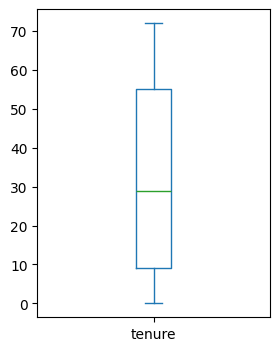

In [100]:
df["tenure"].plot(kind='box', figsize=(3, 4))

Boxplot di atas menunjukkan distribusi lama pelanggan berlangganan **(tenure)** dalam bulan. Terlihat bahwa nilai median berada di sekitar bulan ke-29, sedangkan **kuartil bawah (Q1)** berada di sekitar bulan ke-9, dan **kuartil atas (Q3)** sekitar bulan ke-55. Rentang data cukup lebar dari **0 hingga 72 bulan**, dan grafik ini juga menunjukkan bahwa tidak terdapat outlier.

<Axes: >

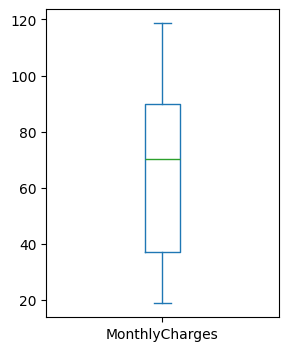

In [101]:
df["MonthlyCharges"].plot(kind='box', figsize=(3, 4))

Boxplot di atas menunjukkan distribusi nilai **MonthlyCharges** atau tagihan bulanan pelanggan. Nilai median berada di sekitar 70, dengan **kuartil bawah (Q1)** sekitar 37 dan **kuartil atas (Q3)** sekitar 90. Nilai tagihan berada dalam rentang sekitar 18 hingga 118, dan tidak terlihat adanya outlier.

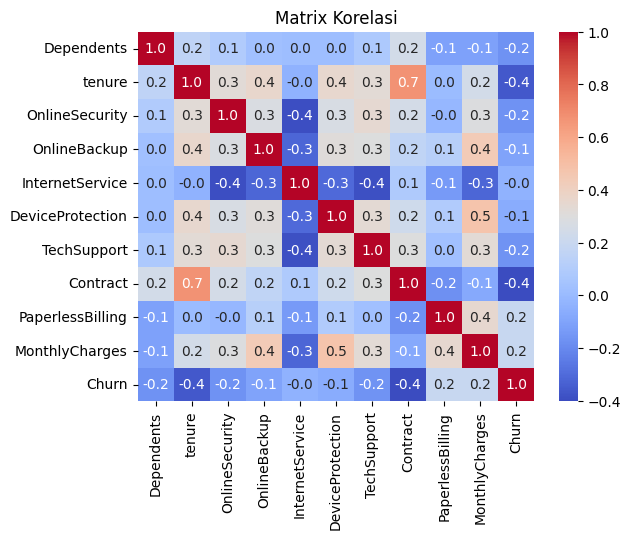

In [103]:
import seaborn as sns

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,annot=True,
            cmap='coolwarm',fmt=".1f")
plt.title('Matrix Korelasi')
plt.show()

Matriks korelasi di atas menggambarkan hubungan linear antar kolom dalam dataset. Terlihat bahwa fitur `tenure`, `Contract`, dan `MonthlyCharges` memiliki korelasi paling signifikan terhadap kolom target `Churn`. Fitur `Contract` dan `tenure` berkorelasi negatif, yang berarti semakin lama pelanggan berlangganan atau memiliki kontrak jangka panjang, kemungkinan churn semakin kecil. Sementara itu, `MonthlyCharges` dan `PaperlessBilling` memiliki korelasi positif terhadap churn, yang mengindikasikan bahwa pelanggan dengan tagihan tinggi dan penagihan digital lebih rentan untuk berhenti berlangganan.

## Data Preprocessing & Splitting

In [102]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# List of column names with 'object' data type
object_columns = df.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each column
for column in object_columns:
    df[column] = le.fit_transform(df[column])

# Display information about the updated DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   int64  
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   int64  
 3   OnlineBackup      4930 non-null   int64  
 4   InternetService   4930 non-null   int64  
 5   DeviceProtection  4930 non-null   int64  
 6   TechSupport       4930 non-null   int64  
 7   Contract          4930 non-null   int64  
 8   PaperlessBilling  4930 non-null   int64  
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 423.8 KB


Untuk mempersiapkan data sebelum masuk ke tahap pemodelan machine learning, seluruh kolom bertipe `object` perlu diubah menjadi nilai numerik. Oleh karena itu, dilakukan proses **Label Encoding** menggunakan `LabelEncoder` dari library `sklearn`. Label Encoding diterapkan ke setiap kolom kategorikal agar algoritma machine learning dapat mengenali dan mengolahnya. Setelah proses ini dijalankan, seluruh kolom bertipe `object` berhasil dikonversi menjadi tipe data `int64`, seperti yang ditampilkan pada hasil `df.info()`.

Namun, perlu dicatat bahwa kolom `MonthlyCharges` tetap bertipe `float64`. Hal ini memang sesuai, karena kolom tersebut berisi nilai tagihan bulanan dalam bentuk desimal yang mencerminkan data numerik kontinu. Tidak diperlukan encoding tambahan untuk kolom ini karena sudah dalam bentuk numerik yang dapat langsung digunakan untuk training model.

In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges']])

Untuk menyesuaikan skala fitur numerik sebelum digunakan dalam model yang sensitif terhadap skala (seperti Logistic Regression), dilakukan proses **standardisasi** pada kolom `tenure` dan `MonthlyCharges` menggunakan **StandardScaler** dari library `sklearn`.

StandardScaler mengubah nilai kedua kolom tersebut menjadi bentuk standar dengan **rata-rata 0 dan standar deviasi 1**, sehingga membuat semua fitur berada dalam skala yang sebanding. Ini bertujuan agar model tidak memihak pada fitur tertentu hanya karena rentang nilainya lebih besar dari fitur lain. Meskipun model seperti Decision Tree dan Random Forest tidak membutuhkan scaling, proses ini penting dilakukan jika model yang digunakan berbasis perhitungan bobot atau jarak.

In [105]:
from sklearn.model_selection import train_test_split

# Membagi variabel data menjadi variabel dependent dan independent (target)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Membagi data input menjadi data training dan data testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, stratify=y, random_state=42)

Pada tahap ini, data dibagi menjadi dua bagian utama: **fitur (X)** dan **target (y)**. Kolom `Churn` digunakan sebagai target karena merupakan variabel yang ingin diprediksi, sedangkan sisanya digunakan sebagai fitur input.

Selanjutnya, data dibagi menjadi **data training dan data testing** menggunakan fungsi `train_test_split`. Proporsi pembagian adalah **80% untuk training** dan **20% untuk testing**, dengan pengaturan `stratify` pada target (y) agar distribusi kelas tetap seimbang di kedua subset data. Selain itu, `random_state=42` digunakan agar pembagian data bersifat reproducible atau konsisten setiap kali dijalankan.

## Model Training and Evaluation

### Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(random_state=42,class_weight='balanced', max_iter=1000)
lr.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

Pada tahap ini dilakukan proses pelatihan **model Logistic Regression**. Sebelum model dilatih, data training (`X_train`) dan data testing (`X_test`) terlebih dahulu dinormalisasi menggunakan StandardScaler agar seluruh fitur numerik berada pada skala yang sama. Hal ini penting untuk model seperti Logistic Regression yang sensitif terhadap perbedaan skala antar fitur.

Model Logistic Regression kemudian diinisialisasi dengan beberapa pengaturan penting:

- `random_state=42` untuk memastikan hasil yang konsisten saat proses dijalankan ulang,

- `class_weight`='balanced' untuk menangani ketidakseimbangan kelas pada target `Churn`,

- `max_iter=1000` untuk memastikan proses optimisasi memiliki cukup iterasi agar model dapat konvergen dengan baik.

Setelah itu, model dilatih menggunakan data training yang telah diskalakan. Tahapan ini menjadi pondasi awal dalam membangun model prediksi churn dan akan dievaluasi lebih lanjut untuk mengukur performanya.

Logistic Regression
              precision    recall  f1-score   support

           0       0.92      0.72      0.81       723
           1       0.52      0.82      0.64       263

    accuracy                           0.75       986
   macro avg       0.72      0.77      0.72       986
weighted avg       0.81      0.75      0.76       986

ROC AUC: 0.8547612661649548


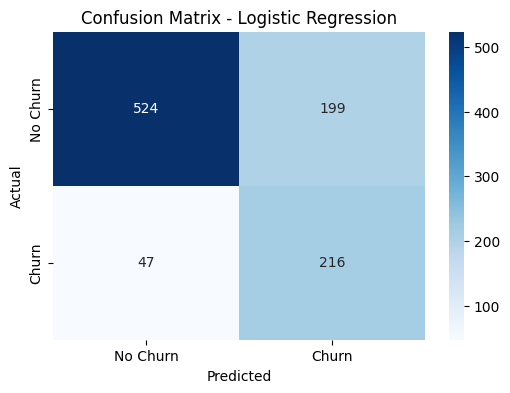

In [107]:
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]


print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))


plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


Setelah model Logistic Regression dilatih dan diuji pada data testing, dilakukan evaluasi performa menggunakan metrik klasifikasi dan confusion matrix. Fokus utama dari model ini adalah mengidentifikasi pelanggan yang berpotensi churn, sehingga perhatian lebih diberikan pada performa dalam mengenali kelas churn.

Model mencatat **akurasi sebesar 75%** dan **recall untuk churn sebesar 82%**, yang berarti sebagian besar pelanggan yang benar-benar churn berhasil dikenali. Namun, masih terdapat **47 pelanggan churn yang tidak terdeteksi** oleh model (false negative), yang berpotensi menjadi risiko bagi perusahaan jika tidak ada tindakan pencegahan. Dari confusion matrix, model juga menghasilkan **199 false positive**, yaitu pelanggan yang diprediksi akan churn, padahal sebenarnya tidak. Meski hal ini bisa menyebabkan intervensi yang tidak perlu, dampaknya lebih ringan dibandingkan kegagalan mendeteksi pelanggan yang benar-benar churn.

Nilai **ROC AUC sebesar 0.85** menunjukkan bahwa model memiliki kemampuan klasifikasi yang cukup baik secara keseluruhan. Evaluasi ini akan dibandingkan lebih lanjut dengan model lain seperti Decision Tree dan Random Forest untuk menentukan model terbaik dalam mengidentifikasi pelanggan yang akan churn.

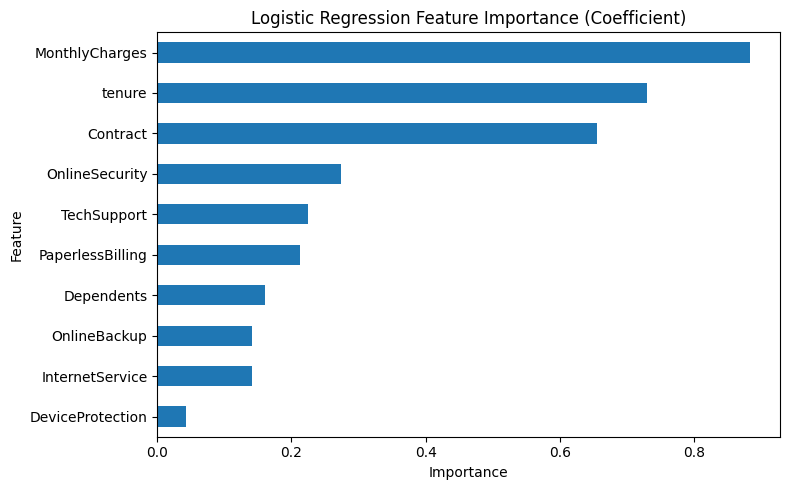

In [108]:
importance = np.abs(lr.coef_[0])  # Ambil nilai absolut agar bisa dibandingkan
feat_importance_lr = pd.Series(importance, index=X.columns)

plt.figure(figsize=(8,5))
feat_importance_lr.sort_values().plot(kind='barh')
plt.title("Logistic Regression Feature Importance (Coefficient)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Setelah model Logistic Regression dievaluasi, dilakukan analisis lebih lanjut terhadap kontribusi masing-masing fitur terhadap prediksi churn menggunakan nilai absolut dari koefisien model. Visualisasi ini membantu memahami fitur mana yang paling berpengaruh terhadap keputusan model dalam mengklasifikasikan pelanggan sebagai churn atau tidak churn.

Dari grafik terlihat bahwa fitur **MonthlyCharges, tenure, dan Contract** merupakan tiga fitur terpenting dalam model.

- **MonthlyCharges** menempati urutan tertinggi, yang menunjukkan bahwa pelanggan dengan tagihan bulanan tinggi memiliki pengaruh kuat terhadap kemungkinan churn.

- **Tenure** (lama berlangganan) juga menjadi faktor penting—biasanya pelanggan yang baru bergabung cenderung lebih berisiko untuk churn.

- **Contract** (jenis kontrak) menjadi indikator penting lainnya, yang sejalan dengan logika bahwa pelanggan dengan kontrak jangka panjang biasanya lebih stabil dibanding pelanggan dengan kontrak bulanan.

Fitur-fitur lain seperti OnlineSecurity, TechSupport, dan PaperlessBilling juga memiliki kontribusi, meskipun tidak sebesar tiga fitur utama tersebut.

### Decision Tree

In [109]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5,class_weight='balanced', random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

Setelah membangun model Logistic Regression, langkah selanjutnya adalah menerapkan algoritma **Decision Tree** untuk memprediksi churn pelanggan. Model **Decision Tree** dilatih menggunakan data pelatihan dengan parameter `max_depth=5`, `class_weight='balanced'`, dan `random_state=42`.

- Penggunaan` max_depth=5` bertujuan untuk mencegah overfitting dengan membatasi kedalaman pohon.

- Penetapan `class_weight='balanced'` digunakan untuk menangani ketidakseimbangan kelas (imbalance) antara churn dan non-churn.

- Sementara `random_state=42` digunakan agar hasil pelatihan model bersifat konsisten dan reproducible.

Setelah model dilatih dengan `X_train` dan `y_train`, dilakukan prediksi terhadap data testing (`X_test`) dan disimpan dalam `y_pred_dt`. Tahap ini menjadi dasar untuk evaluasi performa model Decision Tree terhadap data churn pelanggan.

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.90      0.75      0.82       723
           1       0.53      0.77      0.63       263

    accuracy                           0.76       986
   macro avg       0.72      0.76      0.72       986
weighted avg       0.80      0.76      0.77       986

ROC AUC: 0.8372250182751422


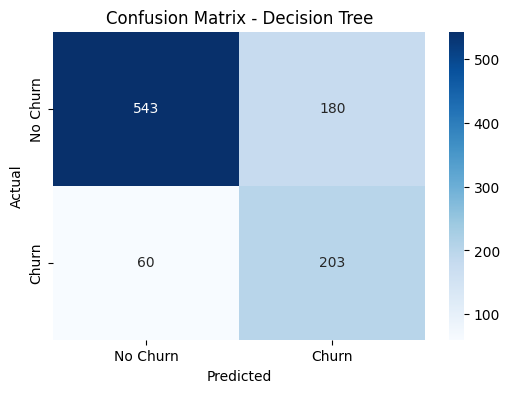

In [110]:
from sklearn.metrics import classification_report, roc_auc_score

print("DecisionTreeClassifier")
print(classification_report(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, dt.predict_proba(X_test)[:,1]))

# Visualisasi Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()



Setelah membangun model Decision Tree, dilakukan evaluasi terhadap hasil prediksi menggunakan data testing. Tujuan tetap difokuskan pada kemampuan model dalam mengenali pelanggan yang akan melakukan churn, dengan memperhatikan metrik klasifikasi dan confusion matrix.

Model mencatat **akurasi sebesar 76%** dengan **recall untuk churn sebesar 77%**, yang berarti model berhasil mengenali 77% dari seluruh pelanggan yang benar-benar churn. Namun, masih terdapat **60 pelanggan churn yang tidak berhasil dikenali** (false negative), sedikit lebih baik dibandingkan Logistic Regression yang sebelumnya memiliki 47 false negative.

Di sisi lain, model memprediksi **203 pelanggan churn dengan benar**, tetapi juga menghasilkan **180 false positive**, yaitu pelanggan yang diprediksi akan churn padahal sebenarnya tidak.
Pola ini cukup umum terjadi pada model yang lebih menekankan pada deteksi kelas minoritas, sehingga cenderung memberikan lebih banyak prediksi churn untuk meminimalkan kesalahan tidak terdeteksinya pelanggan yang benar-benar churn.

Nilai **ROC AUC sebesar 0.84** menunjukkan bahwa model Decision Tree memiliki kemampuan yang cukup baik dalam membedakan antara pelanggan churn dan tidak churn. Hasil ini akan dibandingkan lebih lanjut dengan model Random Forest untuk melihat apakah ensemble method dapat meningkatkan performa prediksi churn.

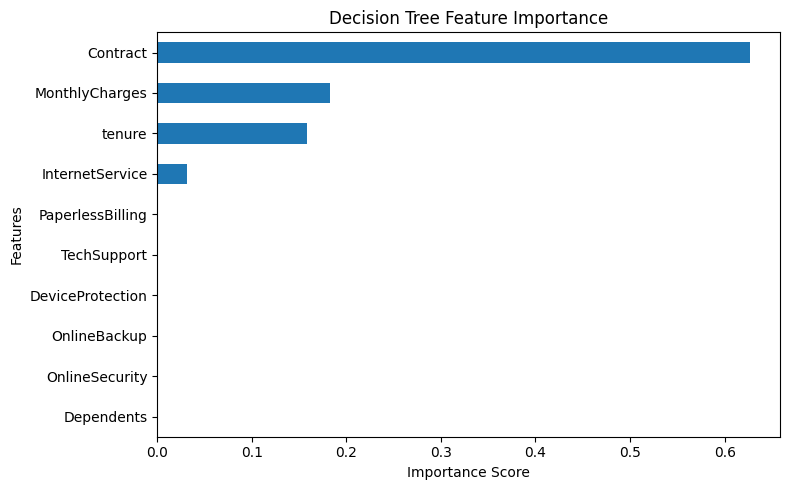

In [111]:
# Buat Series dari feature importance
feat_importance = pd.Series(dt.feature_importances_, index=X.columns)

# Visualisasi
plt.figure(figsize=(8, 5))
feat_importance.sort_values().plot(kind='barh')
plt.title('Decision Tree Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

Visualisasi di atas menampilkan tingkat kepentingan masing-masing fitur dalam proses pengambilan keputusan oleh model Decision Tree. Nilai **feature importance** menunjukkan seberapa besar kontribusi sebuah fitur dalam membagi data untuk meminimalkan impurity pada setiap node di pohon keputusan.

Dari grafik terlihat bahwa fitur **Contract** memiliki kontribusi paling tinggi terhadap prediksi churn, jauh di atas fitur lainnya. Ini menunjukkan bahwa jenis kontrak yang dimiliki pelanggan sangat memengaruhi kemungkinan mereka untuk churn. Diikuti oleh **MonthlyCharges** dan **Tenure** yang juga berperan penting, menunjukkan bahwa total tagihan bulanan dan lamanya pelanggan menggunakan layanan turut memberikan informasi signifikan.

Sementara itu, fitur lain seperti **InternetService, TechSupport, atau DeviceProtection** memiliki pengaruh yang sangat kecil atau bahkan tidak digunakan sama sekali dalam struktur pohon keputusan, yang artinya mereka tidak memberikan pembeda yang kuat dalam klasifikasi churn menurut model ini.


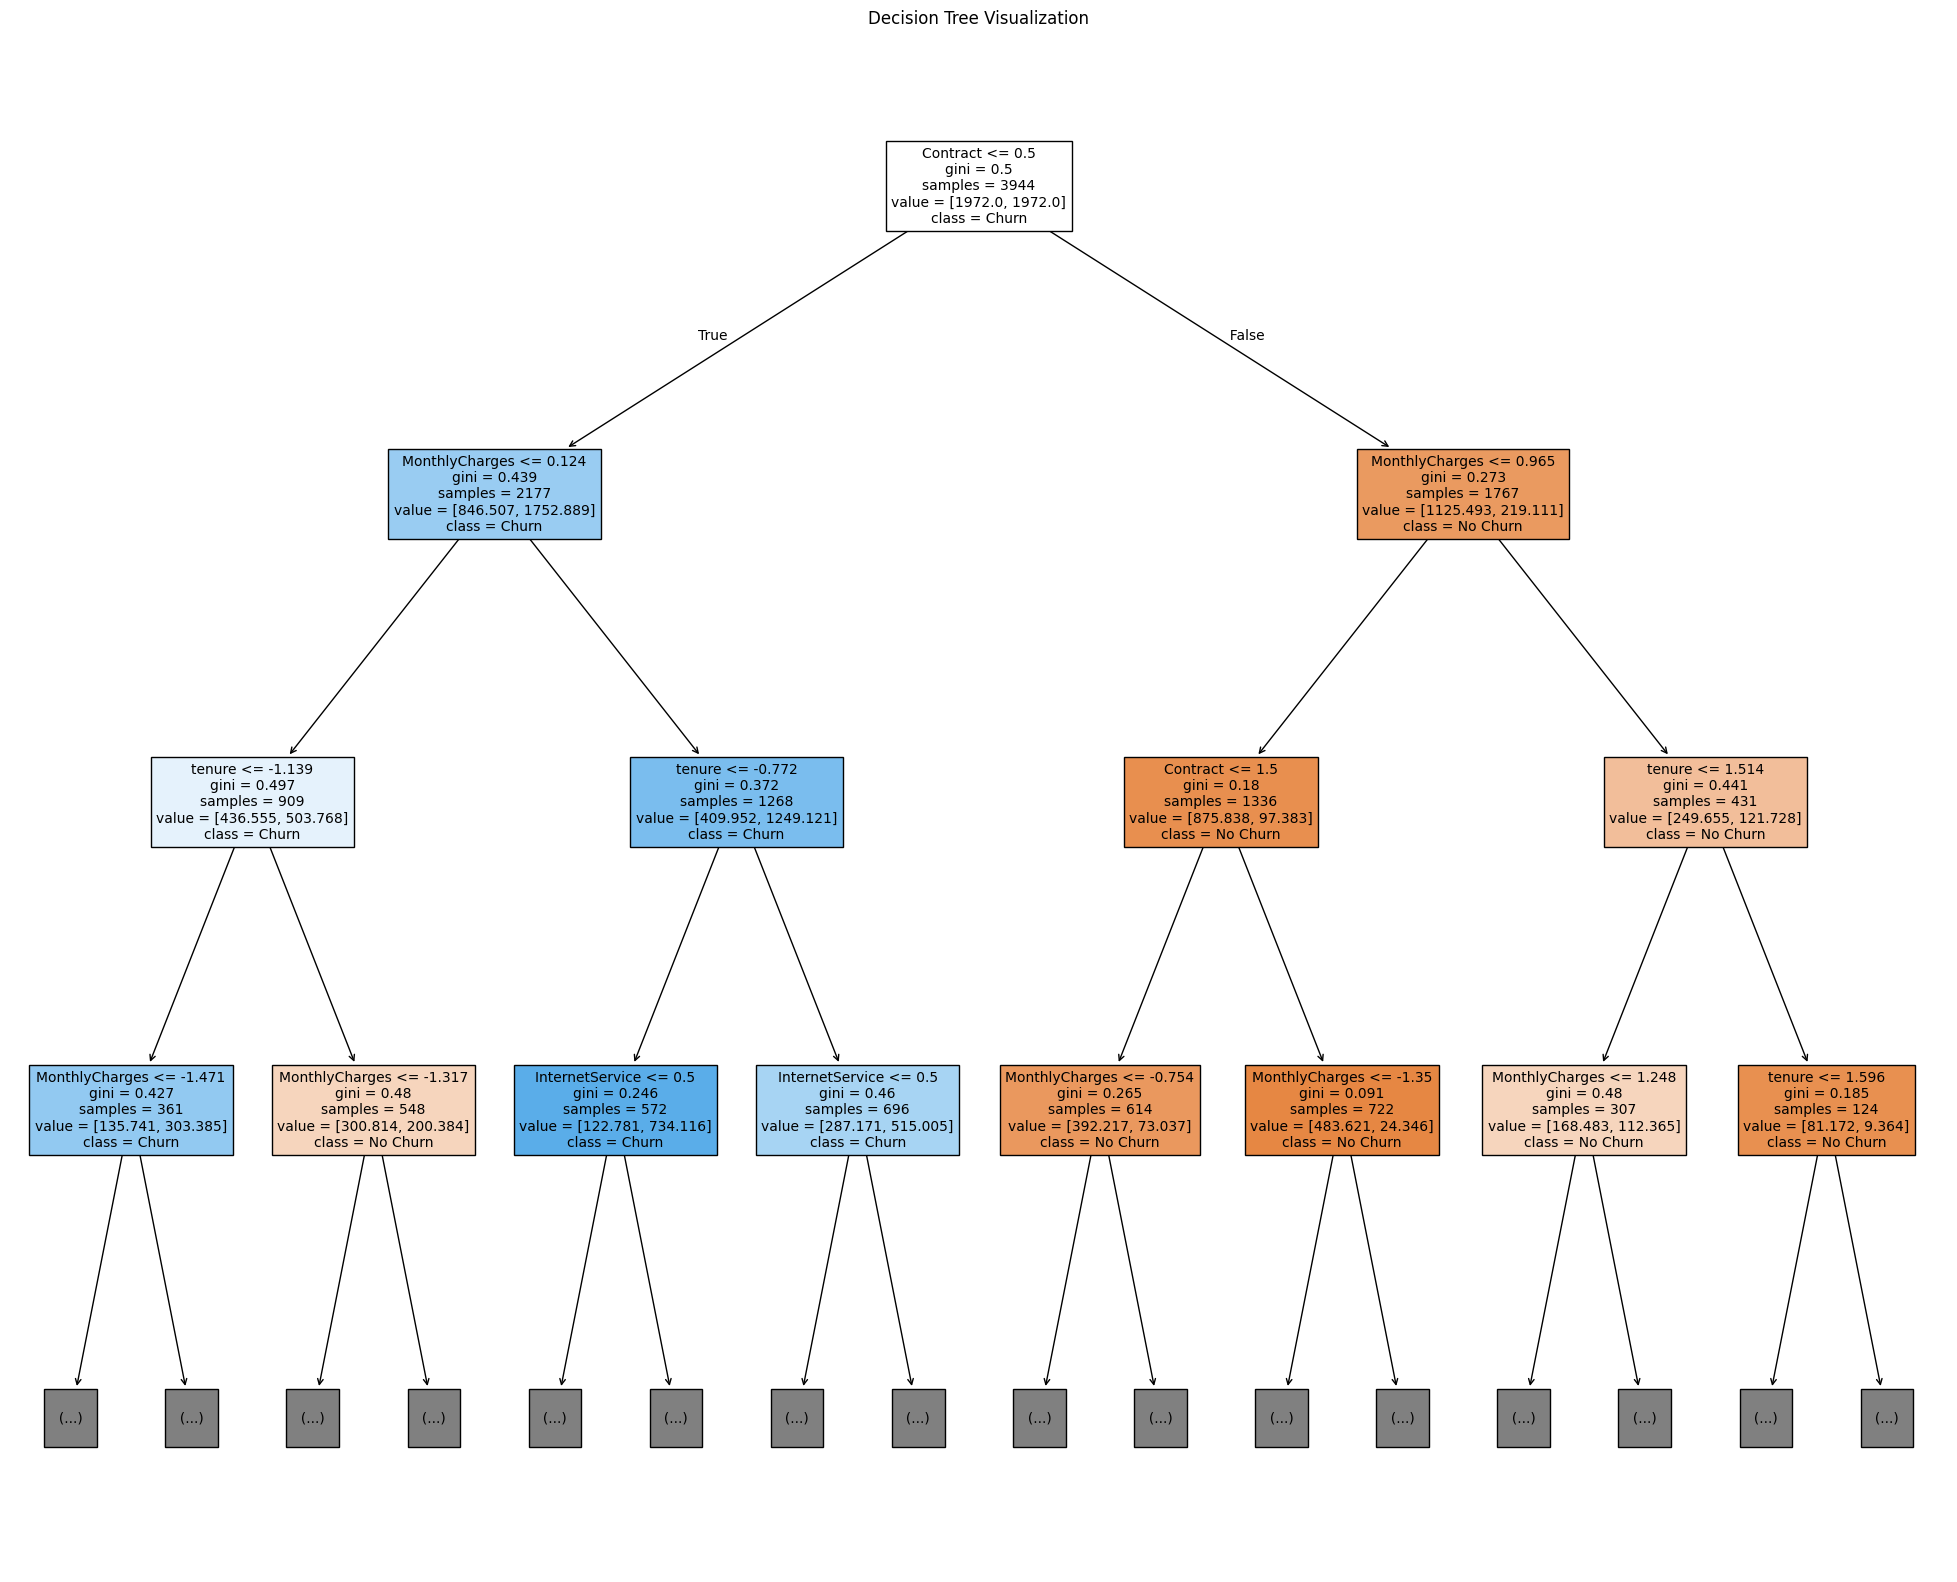

In [112]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25, 20))
plot_tree(dt, feature_names=X.columns, class_names=['No Churn', 'Churn'], filled=True, max_depth=3, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()


Untuk memberikan gambaran cara kerja model Decision Tree, dilakukan visualisasi pohon keputusan hingga kedalaman tiga. Visualisasi ini memberikan gambaran alur pengambilan keputusan model berdasarkan fitur-fitur input. Pada visualisasi tersebut, terlihat bahwa fitur pertama yang digunakan untuk memisahkan data adalah **Contract**, yang menunjukkan bahwa tipe kontrak pelanggan menjadi faktor paling penting dalam menentukan kemungkinan churn. Cabang pohon kemudian dilanjutkan dengan fitur-fitur seperti **MonthlyCharges, tenure, dan InternetService**.

Setiap node pada pohon menampilkan informasi seperti:

- **Gini**: ukuran impurity atau ketidakmurnian di node tersebut,

- **Samples**: jumlah sampel data yang masuk ke node tersebut,

- **Value**: jumlah sampel dari masing-masing kelas (No Churn dan Churn),

- **Class**: prediksi mayoritas pada node tersebut.

Warna pada node menunjukkan kecenderungan klasifikasi semakin biru berarti cenderung memprediksi "No Churn", sementara semakin oranye berarti cenderung "Churn". Warna yang lebih pekat menandakan tingkat kepastian yang lebih tinggi.

### Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

Setelah membangun model Logistic Regression dan Decision Tree, tahap selanjutnya adalah melatih model **Random Forest Classifier**. Random Forest merupakan metode ensemble learning yang terdiri dari banyak pohon keputusan (decision trees) dan menggabungkan prediksi dari masing-masing pohon untuk menghasilkan keputusan akhir yang lebih stabil dan akurat.

Dalam penerapan ini, model Random Forest dibangun dengan **100 estimator** (pohon keputusan) dan parameter `class_weight='balanced'` digunakan untuk menangani ketidakseimbangan kelas antara pelanggan yang churn dan tidak churn. Selain itu, `random_state=42` digunakan agar hasilnya konsisten setiap kali dijalankan ulang.

Setelah proses pelatihan menggunakan data latih (`X_train`, `y_train`), model kemudian digunakan untuk melakukan prediksi pada data uji (`X_test`). Prediksi hasil klasifikasi disimpan dalam variabel `y_pred_rf`, yang selanjutnya akan dievaluasi menggunakan metrik performa seperti akurasi, recall, f1-score, dan ROC AUC untuk mengetahui seberapa baik model ini dalam mengidentifikasi pelanggan yang berpotensi churn.

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       723
           1       0.61      0.48      0.53       263

    accuracy                           0.78       986
   macro avg       0.72      0.68      0.69       986
weighted avg       0.77      0.78      0.77       986

ROC AUC: 0.8283872121336424


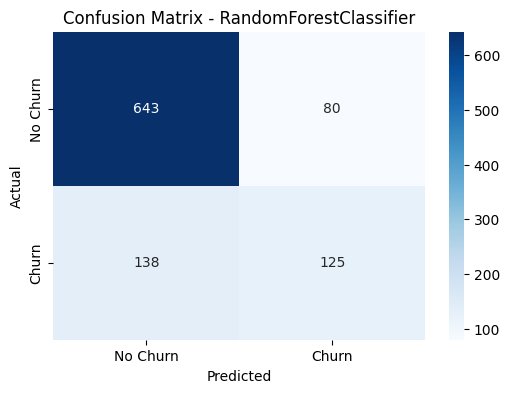

In [114]:
from sklearn.metrics import classification_report, roc_auc_score

print("RandomForestClassifier")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

# Visualisasi Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - RandomForestClassifier")
plt.show()


Setelah pelatihan, model **Random Forest Classifier** diuji menggunakan data testing untuk mengevaluasi kemampuannya dalam mengklasifikasikan pelanggan churn dan tidak churn. Hasil evaluasi menunjukkan bahwa model ini memiliki **akurasi sebesar 78%**, sedikit lebih tinggi dibanding model Logistic Regression dan Decision Tree sebelumnya. Namun, karena fokus utama tetap pada identifikasi pelanggan churn, perhatian difokuskan pada metrik recall untuk kelas churn. Nilai **recall churn hanya sebesar 48%**, yang berarti bahwa dari seluruh pelanggan yang benar-benar churn, hanya 48% yang berhasil dikenali oleh model. Ini menunjukkan adanya **false negative sebanyak 138 pelanggan churn**, yaitu pelanggan yang seharusnya churn tetapi diprediksi tidak churn oleh model.

Sementara itu, model juga menghasilkan false positive sebanyak 80, yaitu pelanggan yang diprediksi akan churn padahal sebenarnya tidak. Meskipun ini bisa menyebabkan intervensi yang tidak diperlukan, risikonya lebih kecil dibandingkan pelanggan churn yang tidak terdeteksi. Metrik **ROC AUC** berada di angka **0.83**, yang menunjukkan bahwa secara keseluruhan model cukup baik dalam membedakan pelanggan churn dan tidak churn. Meskipun begitu, rendahnya recall untuk churn membuat model ini kurang ideal jika tujuan utamanya adalah meminimalkan risiko kehilangan pelanggan.

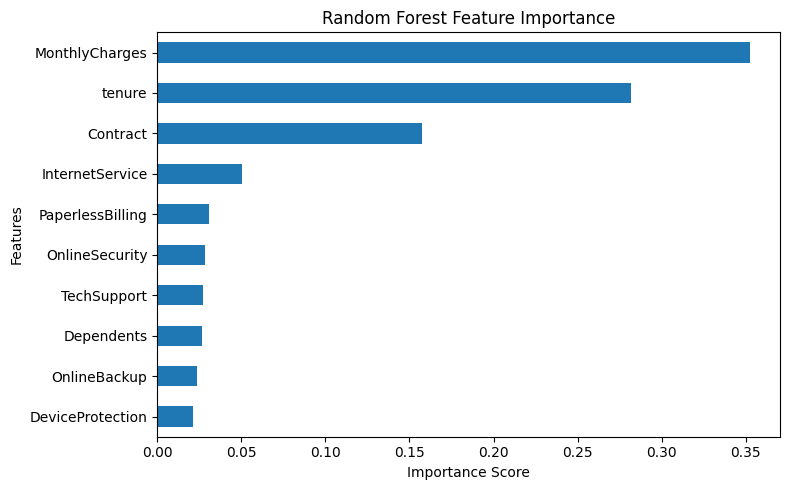

In [115]:
feat_importance_rf = pd.Series(rf.feature_importances_, index=X.columns)
feat_importance_rf.sort_values().plot(kind='barh', figsize=(8, 5))
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


Visualisasi Feature Importance dari model **Random Forest Classifier** memberikan gambaran mengenai sejauh mana setiap fitur berkontribusi dalam proses pengambilan keputusan model terhadap prediksi churn.

Dari grafik di atas, terlihat bahwa fitur **MonthlyCharges, tenure, dan Contract** merupakan tiga fitur paling berpengaruh.

- **MonthlyCharges** menjadi fitur paling penting, menandakan bahwa besarnya tagihan bulanan sangat menentukan apakah pelanggan akan melakukan churn.

- **Tenure** atau lama berlangganan menempati posisi kedua, mengindikasikan bahwa pelanggan dengan durasi lebih pendek cenderung memiliki kemungkinan churn yang lebih tinggi.

- **Contract** juga menunjukkan pengaruh signifikan, terutama dalam membedakan pelanggan yang terikat kontrak jangka panjang dengan yang tidak.

Fitur lainnya seperti InternetService, PaperlessBilling, dan OnlineSecurity memiliki kontribusi yang jauh lebih kecil dalam menentukan churn, sementara fitur-fitur seperti DeviceProtection dan OnlineBackup menunjukkan pengaruh yang paling rendah.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Simpan skor semua model
model_names = ["Logistic Regression", "Decision Tree", "Random Forest"]
accuracy = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf),
]
precision = [
    precision_score(y_test, y_pred_lr),
    precision_score(y_test, y_pred_dt),
    precision_score(y_test, y_pred_rf),
]
recall = [
    recall_score(y_test, y_pred_lr),
    recall_score(y_test, y_pred_dt),
    recall_score(y_test, y_pred_rf),
]
f1 = [
    f1_score(y_test, y_pred_lr),
    f1_score(y_test, y_pred_dt),
    f1_score(y_test, y_pred_rf),
]
roc_auc = [
    roc_auc_score(y_test, y_prob_lr),
    roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1]),
    roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]),
]

# Buat DataFrame
summary_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": roc_auc
})

# Display the summary DataFrame
print("Model Performance Summary:")
print(summary_df)


Model Performance Summary:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.750507   0.520482  0.821293  0.637168  0.854761
1        Decision Tree  0.756592   0.530026  0.771863  0.628483  0.837225
2        Random Forest  0.778905   0.609756  0.475285  0.534188  0.828387


Dalam tahap evaluasi model, saya membandingkan tiga algoritma klasifikasi yaitu **Logistic Regression**, **Decision Tree**, dan **Random Forest**. Evaluasi dilakukan dengan menggunakan lima metrik utama:

- **Accuracy**: Proporsi prediksi yang benar dari keseluruhan data.

- **Precision**: Proporsi prediksi churn (positif) yang benar-benar churn.

- **Recall**: Proporsi pelanggan churn yang berhasil dideteksi model (sangat penting untuk kasus ini).

- **F1 Score**: Rata-rata harmonis dari precision dan recall, cocok saat perlu keseimbangan.

- **ROC AUC**: Kemampuan model dalam membedakan antara kelas churn dan tidak churn secara keseluruhan.

Evaluasi dilakukan dengan memanfaatkan fungsi `accuracy_score`, `precision_score`, `recall_score`, `f1_score`, dan `roc_auc_score` dari *library* `sklearn.metrics`. Hasil evaluasi disimpan dalam bentuk tabel `summary_df` untuk memudahkan perbandingan antar model.

## Kesimpulan 

Setelah melakukan evaluasi terhadap tiga algoritma klasifikasi, yaitu Logistic Regression, Decision Tree, dan Random Forest, diperoleh hasil bahwa **Logistic Regression** memberikan performa terbaik dalam memprediksi pelanggan yang berisiko churn. Evaluasi model dilakukan menggunakan lima metrik utama, yaitu: accuracy, precision, recall, F1 score, dan ROC AUC. Dari kelima metrik tersebut, r**ecall dipilih sebagai metrik utama dalam pengambilan keputusan**, karena berkaitan langsung dengan tujuan bisnis dalam mempertahankan pelanggan. Dalam kasus churn prediction, **dampak terbesar terjadi ketika perusahaan gagal mengenali pelanggan yang benar-benar akan berhenti berlangganan**. Oleh karena itu, model dengan nilai recall tinggi akan lebih bermanfaat karena dapat mengenali sebanyak mungkin pelanggan yang perlu ditindaklanjuti.

Model **Logistic Regression mencatatkan nilai recall sebesar 0.82 dan ROC AUC sebesar 0.85**, yang menunjukkan bahwa model ini mampu menangkap sebagian besar pelanggan yang berisiko churn serta memiliki kemampuan pemisahan kelas yang sangat baik secara umum. Sementara itu, meskipun Random Forest mencatatkan accuracy dan precision tertinggi, nilai recall-nya yang rendah menunjukkan kelemahan dalam mengenali pelanggan churn secara menyeluruh.

Dari sisi fitur, analisis koefisien Logistic Regression menunjukkan bahwa variabel **MonthlyCharges**, **tenure**, dan **Contract** merupakan fitur yang paling berpengaruh terhadap prediksi churn. Hal ini menunjukkan bahwa pelanggan dengan biaya bulanan tinggi, masa berlangganan yang singkat, dan kontrak jangka pendek memiliki kemungkinan lebih besar untuk berhenti menggunakan layanan.

## Rekomendasi

1. Penggunaan Model:

- Model Logistic Regression dapat digunakan sebagai dasar pengambilan keputusan dalam upaya mempertahankan pelanggan yang berisiko churn.

- Model ini memiliki kemampuan yang baik dalam mengidentifikasi pelanggan yang kemungkinan besar akan berhenti, sehingga hasil prediksinya dapat dijadikan referensi dalam merancang strategi retensi.

2. Strategi Penanganan Pelanggan:

- Fokuskan langkah-langkah perusahaan pada pelanggan dengan karakteristik seperti:

    - Lama berlangganan yang singkat (tenure rendah),

    - Biaya bulanan tinggi,

    - Kontrak jangka pendek.

- Upaya yang dapat dilakukan mencakup penawaran khusus, pengingat kontrak, atau program loyalitas yang disesuaikan dengan profil pelanggan tersebut, agar pelanggan merasa lebih dihargai dan tertarik untuk tetap menggunakan layanan.

3. Pengembangan Selanjutnya:

- Untuk meningkatkan performa model ke depannya, disarankan menambahkan variabel tambahan seperti histori keluhan, riwayat transaksi, atau tingkat kepuasan layanan.

- Selain itu, pembaruan model secara berkala perlu dilakukan agar tetap relevan dengan perubahan tren dan perilaku pelanggan dari waktu ke waktu.